<a href="https://colab.research.google.com/github/danikayoung16/MAT421/blob/main/Module7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module J: Section 4.1 and 4.2

Danika Young

# Graph Construction and Visualization

A graph consists of:
- **Nodes (Vertices)**: represent entities
- **Edges**: represent connections between entities

Graphs can be:
- **Undirected**: edges go both ways (e.g., Facebook friendship)
- **Directed**: edges go one way (e.g., Twitter following)
- **Weighted**: edges have numerical weights (e.g., distances, strengths)

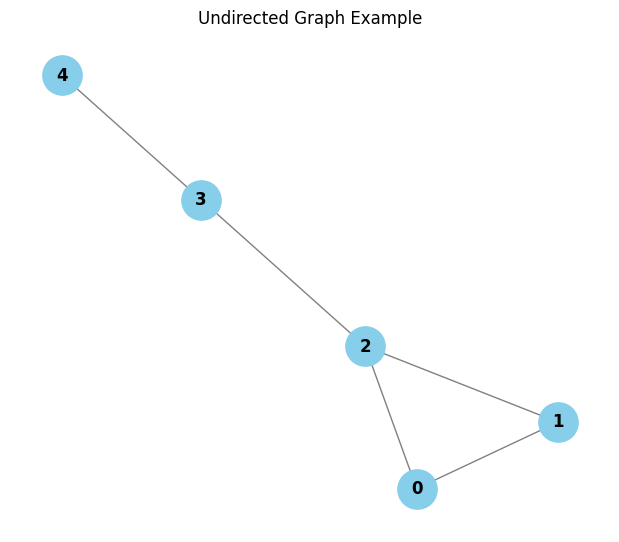

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a basic undirected graph with 5 nodes
G = nx.Graph()
G.add_edges_from([(0, 1), (1, 2), (2, 0), (3, 4), (2, 3)])

plt.figure(figsize=(6, 5))
nx.draw(G, with_labels=True, node_color='skyblue', node_size=800, font_weight='bold', edge_color='gray')
plt.title("Undirected Graph Example")
plt.show()


# Adjacency Matrix

An **adjacency matrix A** is an `n x n` matrix where `A[i][j] = 1` if there is an edge between node i and node j, and 0 otherwise.

- For **undirected graphs**, the matrix is symmetric.
- For **weighted graphs**, the matrix holds weights instead of 1s.

In [2]:
# Adjacency matrix (dense format)
A = nx.adjacency_matrix(G).todense()
print("Adjacency Matrix:\n", A)


Adjacency Matrix:
 [[0 1 1 0 0]
 [1 0 1 0 0]
 [1 1 0 1 0]
 [0 0 1 0 1]
 [0 0 0 1 0]]


# Degree Matrix

The **degree matrix D** is a diagonal matrix where each entry D[i][i] is the number of edges connected to node `i`.

It's useful for calculating the Laplacian matrix `L = D - A`.

In [3]:
import numpy as np

# Degree matrix (diagonal)
degree_values = [val for (node, val) in G.degree()]
D = np.diag(degree_values)
print("Degree Matrix:\n", D)


Degree Matrix:
 [[2 0 0 0 0]
 [0 2 0 0 0]
 [0 0 3 0 0]
 [0 0 0 2 0]
 [0 0 0 0 1]]


# Incidence Matrix

An **incidence matrix I** is an `n x m` matrix:
- Rows = nodes
- Columns = edges
- Entry I[i][j] = 1 if node i is connected to edge j

### Oriented vs. Unoriented:
- **Oriented**: 1 for source, -1 for target
- **Unoriented**: 1s for both nodes connected to an edge

In [4]:
# Oriented incidence matrix
I_oriented = nx.incidence_matrix(G, oriented=True).todense()
print("Oriented Incidence Matrix:\n", I_oriented)

# Unoriented (binary) incidence matrix
I_unoriented = nx.incidence_matrix(G, oriented=False).todense()
print("Unoriented Incidence Matrix:\n", I_unoriented)


Oriented Incidence Matrix:
 [[-1. -1.  0.  0.  0.]
 [ 1.  0. -1.  0.  0.]
 [ 0.  1.  1. -1.  0.]
 [ 0.  0.  0.  1. -1.]
 [ 0.  0.  0.  0.  1.]]
Unoriented Incidence Matrix:
 [[1. 1. 0. 0. 0.]
 [1. 0. 1. 0. 0.]
 [0. 1. 1. 1. 0.]
 [0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 1.]]


# Laplacian Matrix

The **Laplacian matrix L** is defined as:

L = D - A

It reflects the structure of the graph and is widely used in:
- Diffusion processes
- Clustering
- Spectral analysis

Properties:
- Symmetric
- Positive semi-definite
- First eigenvalue is always 0

In [5]:
# Compute Laplacian
L = nx.laplacian_matrix(G).todense()
print("Laplacian Matrix:\n", L)

Laplacian Matrix:
 [[ 2 -1 -1  0  0]
 [-1  2 -1  0  0]
 [-1 -1  3 -1  0]
 [ 0  0 -1  2 -1]
 [ 0  0  0 -1  1]]


#  Eigenvalues and Eigenvectors

The eigenvalues of the Laplacian provide structural information:
- **0** is always the smallest eigenvalue
- The **second smallest eigenvalue (λ₂)** is called the **Fiedler value**
  - If λ₂ > 0, the graph is connected
  - λ₂ helps partition the graph into clusters

In [6]:
# Compute eigenvalues and eigenvectors
eigvals, eigvecs = np.linalg.eigh(L)

print("Eigenvalues:\n", eigvals.round(3))
print("Fiedler Vector (2nd smallest eigenvector):\n", eigvecs[:, 1].round(3))


Eigenvalues:
 [0.    0.519 2.311 3.    4.17 ]
Fiedler Vector (2nd smallest eigenvector):
 [ 0.419  0.419  0.202 -0.338 -0.702]


# Spectral Clustering Visualization


Nodes are grouped based on the **sign** of their Fiedler vector value:
- Negative → Cluster 1
- Positive → Cluster 2

This simple method separates the graph based on connectivity patterns.

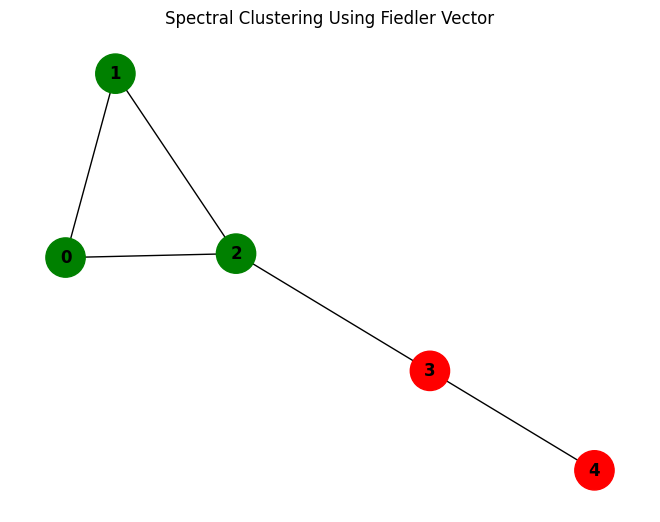

In [7]:
# Cluster nodes using the Fiedler vector
fiedler_vector = eigvecs[:, 1]
colors = ['red' if val < 0 else 'green' for val in fiedler_vector]

nx.draw(G, with_labels=True, node_color=colors, node_size=800, font_weight='bold')
plt.title("Spectral Clustering Using Fiedler Vector")
plt.show()


# Graph Partitioning: Ratio Cut

The **ratio cut** balances the number of connections between partitions and the size of each partition:

(V1,V2) = (V1,V2) / (|V1|) + (V1,V2) / (|V2|)


A lower value indicates a better-balanced and cleaner partition.

In [8]:
# Partition size for each group
num_nodes = G.number_of_nodes()
V1 = [i for i in range(num_nodes) if fiedler_vector[i] < 0]
V2 = [i for i in range(num_nodes) if fiedler_vector[i] >= 0]

cut_size = sum(1 for u, v in G.edges if (u in V1 and v in V2) or (u in V2 and v in V1))
ratio_cut = cut_size / len(V1) + cut_size / len(V2)

print(f"Cut Size = {cut_size}")
print(f"Ratio Cut = {ratio_cut:.2f}")


Cut Size = 1
Ratio Cut = 0.83
